# Statistical Inference

In [1]:
library(ggplot2)
library(ggpubr)
library(fitdistrplus)
library(nortest)
library(car)
library(bestNormalize)

Loading required package: MASS

Loading required package: survival

Loading required package: carData


Attaching package: ‘bestNormalize’


The following object is masked from ‘package:MASS’:

    boxcox




In [ ]:
# Load dataset
data <- read.csv("../results/cardiovascular_disease_clean.csv", 
                colClasses = c("numeric", "factor", "integer", "numeric", "integer", "integer", "factor", "factor", "factor", "factor", "factor", "factor", "numeric", "numeric"),
                col.names=c("Age(years)", "Gender", "Height(cm)", "Weight(kg)", "SystolicPressure", "DisatolicPressure", "Cholesterol", "Glucose", "Smoke", "Alcohol", "Active", "CardiovascularDisease", "BMI", "Pulse"))
quantitative.cols <- c(1, 3, 4, 5, 6, 13, 14)
print(paste("The dataset has ", dim(data)[2], " "))

[1] 61215    14

### Distribuciones

In [65]:
plot_histograms <- function(column){
    ggplot(data, aes(x=data[,column], fill=CardiovascularDisease)) + 
    geom_density(alpha=0.5) +
    labs(x=column) +
    theme(axis.text=element_text(size=15), 
    axis.title.x = element_text(size = 20),  # X-axis title font size
    axis.title.y = element_text(size = 20),
    legend.title = element_text(size = 20),  # Legend title font size
    legend.text = element_text(size = 20)  )  # Y-axis title font size
}
plots <- lapply(colnames(data[, quantitative.cols]), plot_histograms)

plot.arrange <- ggarrange(plots[[1]],plots[[2]],plots[[3]],plots[[6]], plots[[4]],
          plots[[5]],plots[[7]], nrow=2, ncol=4)

ggsave("../docs/assests/plot.png",bg = "white", plot = plot.arrange, width = 35, height = 10)



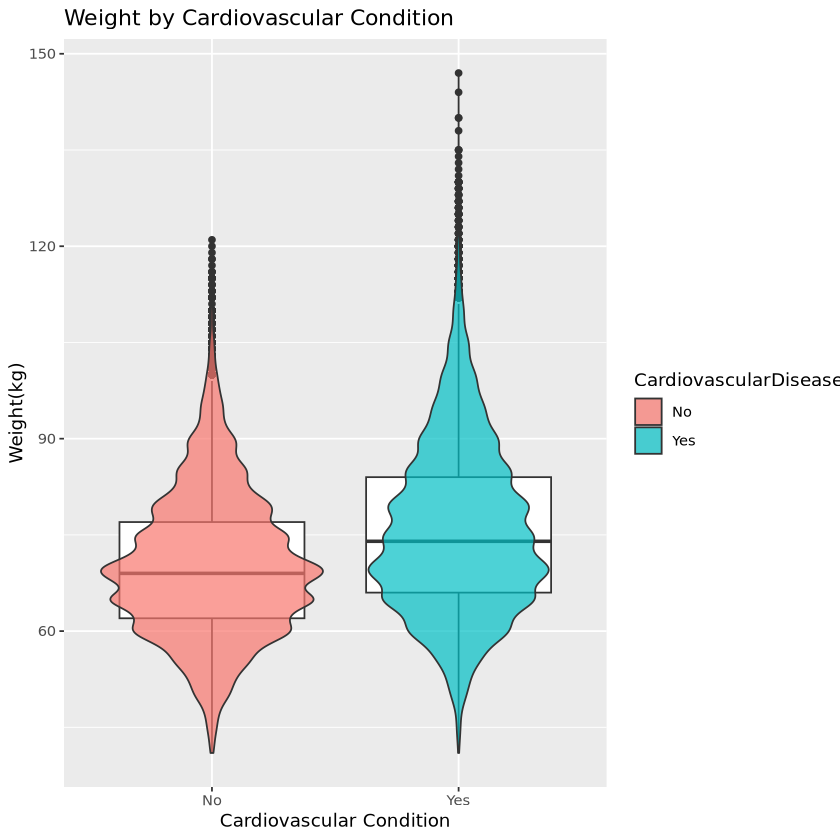

In [38]:
ggplot(data, aes(x=CardiovascularDisease, y=data[,"Weight.kg."], fill=CardiovascularDisease)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.7, ) +
 labs(title = "Weight by Cardiovascular Condition", x = "Cardiovascular Condition", y="Weight(kg)") 

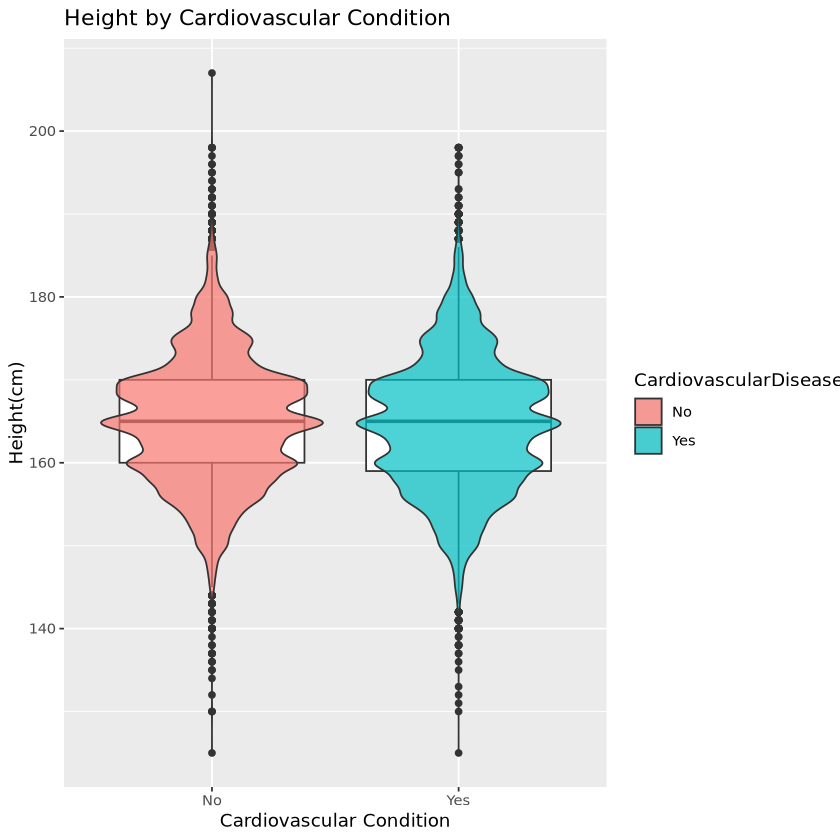

In [37]:
ggplot(data, aes(x=CardiovascularDisease, y=data[,"Height.cm."], fill=CardiovascularDisease)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.7, ) +
 labs(title = "Height by Cardiovascular Condition", x = "Cardiovascular Condition", y="Height(cm)") 

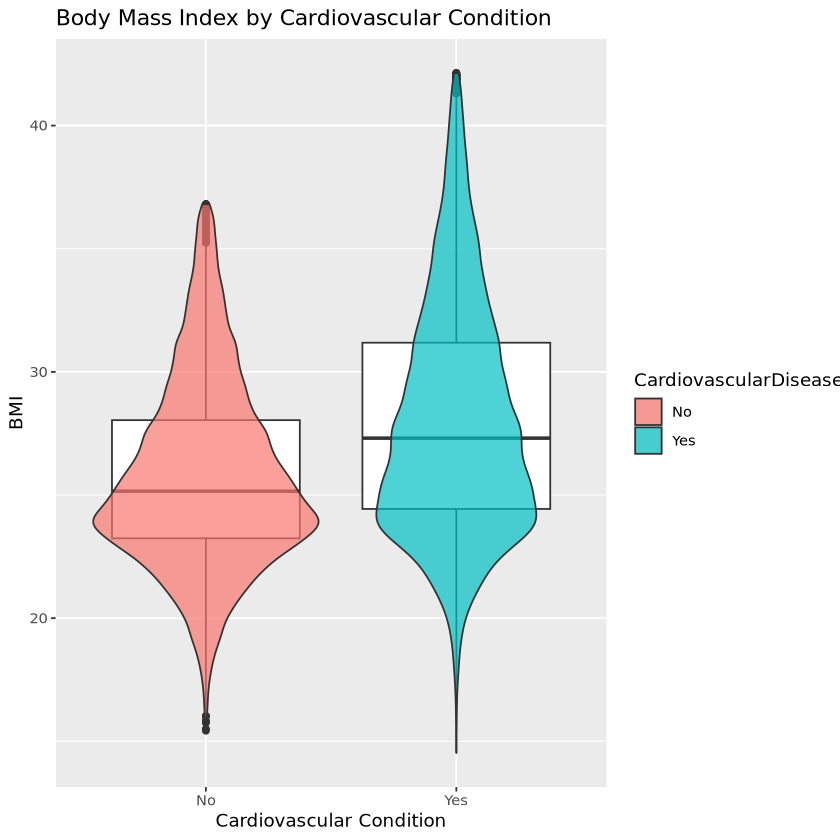

In [41]:
ggplot(data, aes(x=CardiovascularDisease, y=data[,"IMC"], fill=CardiovascularDisease)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.7, ) +
 labs(title = "Body Mass Index by Cardiovascular Condition", x = "Cardiovascular Condition", y="BMI")  

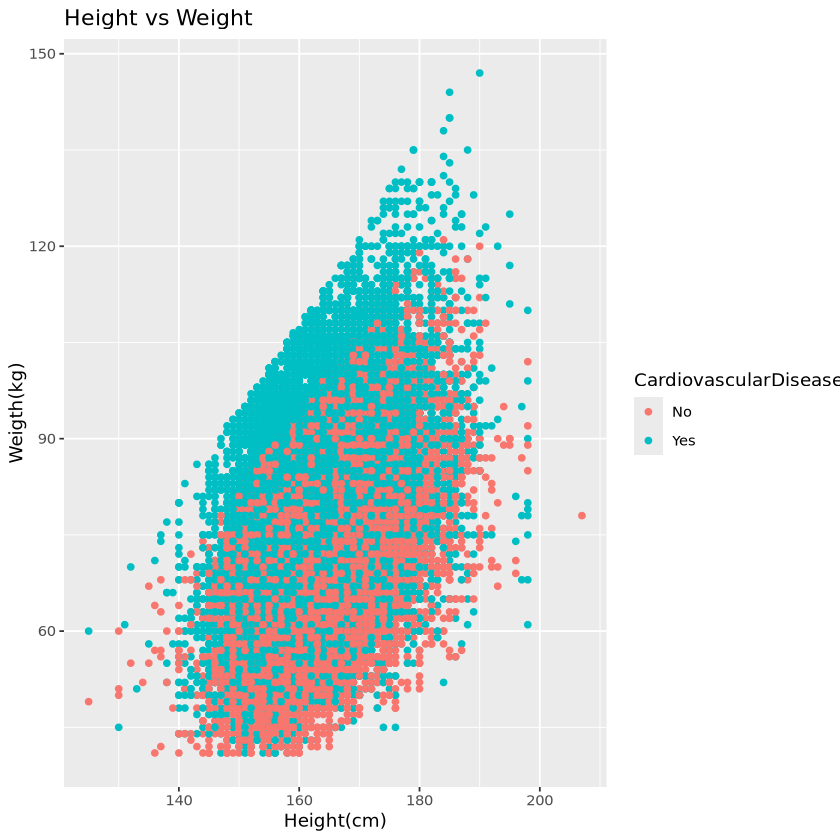

In [40]:
ggplot(data, aes(x=data[,"Height.cm."], y=data[,"Weight.kg."], color=CardiovascularDisease)) +
geom_point() + 
labs(x="Height(cm)", y="Weigth(kg)", title="Height vs Weight")

In [31]:
cor(x=data[,"Height.cm."], y=data[,"Weight.kg."], method = "p")
cor(x=data[,"Height.cm."], y=data[,"Weight.kg."], method = "s")

[1] 0.374998

[1] 0.3535649

In [32]:
cor(x=data[data$CardiovascularDisease == "Yes","Height.cm."], y=data[data$CardiovascularDisease == "Yes","Weight.kg."], method = "p")
cor(x=data[data$CardiovascularDisease == "Yes","Height.cm."], y=data[data$CardiovascularDisease == "Yes","Weight.kg."], method = "s")

[1] 0.3534462

[1] 0.3204116

In [33]:
cor(x=data[data$CardiovascularDisease == "No","Height.cm."], y=data[data$CardiovascularDisease == "No","Weight.kg."], method = "p")
cor(x=data[data$CardiovascularDisease == "No","Height.cm."], y=data[data$CardiovascularDisease == "No","Weight.kg."], method = "s")

[1] 0.4415256

[1] 0.4196988

In [4]:
cardio.yes <- data[data$cardio == "Yes", ]
cardio.no <- data[data$cardio == "No", ]

In [6]:
plot_descdist <- function(colname){
    png(paste("../docs/assests/", colname, "_cardio_yes_dists.png", sep=""), bg = "white", width = 800, height = 600)
    descdist(cardio.yes[, colname], discrete = FALSE)
    dev.off()
}

lapply(colnames(cardio.yes[, quantitative.cols]), plot_descdist)

[[1]]
pdf 
  2 

[[2]]
pdf 
  2 

[[3]]
pdf 
  2 

[[4]]
pdf 
  2 

[[5]]
pdf 
  2 

[[6]]
pdf 
  2 

[[7]]
pdf 
  2

In [7]:
plot_descdist <- function(colname){
    png(paste("../docs/assests/", colname, "_cardio_no_dists.png", sep=""), bg = "white", width = 800, height = 600)
    descdist(cardio.no[, colname])
    dev.off()
}

lapply(colnames(cardio.no[, quantitative.cols]), plot_descdist)

[[1]]
pdf 
  2 

[[2]]
pdf 
  2 

[[3]]
pdf 
  2 

[[4]]
pdf 
  2 

[[5]]
pdf 
  2 

[[6]]
pdf 
  2 

[[7]]
pdf 
  2

Notamos que los datos de las presiones, a pesar de ser numéricos, se comportan como grupos discretos. Por lo tanto, decidimos transformarlos a una variable categórica.

In [105]:
quantitative.cols <- c(1, 3, 4, 13)
data[, quantitative.cols]

Age.years.,Height.cm.,Weight.kg.,BMI
<dbl>,<int>,<dbl>,<dbl>
50.39178,168,62,21.96712
55.41918,156,85,34.92768
51.66301,165,64,23.50781
48.28219,169,82,28.71048
47.87397,156,56,23.01118
60.03836,151,67,29.38468
61.87397,178,95,29.98359
48.40548,158,71,28.44095
54.33973,164,68,25.28257


### Prueba de normalidad

In [34]:
lapply(data[data$CardiovascularDisease == "Yes", quantitative.cols], lillie.test)

$Age.years.

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.071939, p-value < 2.2e-16


$Height.cm.

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.049861, p-value < 2.2e-16


$Weight.kg.

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.070906, p-value < 2.2e-16


$SystolicPressure

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.18746, p-value < 2.2e-16


$DisatolicPressure

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.27007, p-value < 2.2e-16


$IMC

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.070214, p-value < 2.2e-16


$Pulse

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.22199, p-value < 2.2e-16



In [35]:
lapply(data[data$CardiovascularDisease == "No", quantitative.cols], lillie.test)

$Age.years.

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.060965, p-value < 2.2e-16


$Height.cm.

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.055409, p-value < 2.2e-16


$Weight.kg.

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.075991, p-value < 2.2e-16


$SystolicPressure

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.33346, p-value < 2.2e-16


$DisatolicPressure

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.36167, p-value < 2.2e-16


$IMC

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.073631, p-value < 2.2e-16


$Pulse

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.34795, p-value < 2.2e-16



Basado en las estadísticas de normalidad estimadas por el test de Kolmogorov-Smirnov, vemos que ninguno de los datos sigue una distribución normal. Por lo tanto, para el resto de análisis aplicaremos pruebas no paramétricas.

### Homocedasticidad

In [67]:
var(data[data$CardiovascularDisease == "Yes", "Height.cm."])
var(data[data$CardiovascularDisease == "No", "Height.cm."])

[1] 61.90384

[1] 57.64335

In [57]:
apply_fligner <- function(x, col) {
    fligner.test(x = x, g = data[, col])
}
lapply(data[, quantitative.cols], apply_fligner, col="CardiovascularDisease")

$Age.years.

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 145.74, df = 1, p-value < 2.2e-16


$Height.cm.

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 53.315, df = 1, p-value = 2.841e-13


$Weight.kg.

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 817.97, df = 1, p-value < 2.2e-16


$SystolicPressure

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 11337, df = 1, p-value < 2.2e-16


$DisatolicPressure

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 1878.6, df = 1, p-value < 2.2e-16


$BMI

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 1550.5, df = 1, p-value < 2.2e-16


$Pulse

	Fligner-Killeen test of homoge

In [69]:
apply_levene <- function(col, col2){
    leveneTest(y=data[,col]~data[,col2], data = data, center = "median")
    }
levene.results <- lapply(colnames(data[, quantitative.cols]), apply_levene, col2="cardio")
print(levene.results)

[[1]]
Levene's Test for Homogeneity of Variance (center = "median")
         Df F value    Pr(>F)    
group     1  203.25 < 2.2e-16 ***
      61213                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[[2]]
Levene's Test for Homogeneity of Variance (center = "median")
         Df F value  Pr(>F)    
group     1  53.105 3.2e-13 ***
      61213                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[[3]]
Levene's Test for Homogeneity of Variance (center = "median")
         Df F value    Pr(>F)    
group     1  834.87 < 2.2e-16 ***
      61213                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[[4]]
Levene's Test for Homogeneity of Variance (center = "median")
         Df F value    Pr(>F)    
group     1   14612 < 2.2e-16 ***
      61213                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[[5]]
Levene's Test for Homogeneity of Variance (cente

In [86]:
print("Cholesterol")
apply_fligner <- function(x, col) {
    fligner.test(x = x, g = data[, col])
}
lapply(data[, quantitative.cols], apply_fligner, col="cholesterol")

print("Gender")
apply_fligner <- function(x, col) {
    fligner.test(x = x, g = data[, col])
}
lapply(data[, quantitative.cols], apply_fligner, col="gender")

print("Gluc")
apply_fligner <- function(x, col) {
    fligner.test(x = x, g = data[, col])
}
lapply(data[, quantitative.cols], apply_fligner, col="gluc")

print("smoke")
apply_fligner <- function(x, col) {
    fligner.test(x = x, g = data[, col])
}
lapply(data[, quantitative.cols], apply_fligner, col="smoke")

print("alco")
apply_fligner <- function(x, col) {
    fligner.test(x = x, g = data[, col])
}
lapply(data[, quantitative.cols], apply_fligner, col="alco")

print("active")
apply_fligner <- function(x, col) {
    fligner.test(x = x, g = data[, col])
}
lapply(data[, quantitative.cols], apply_fligner, col="active")

print("cardio")
apply_fligner <- function(x, col) {
    fligner.test(x = x, g = data[, col])
}
lapply(data[, quantitative.cols], apply_fligner, col="cardio")



[1] "Cholesterol"


$age_year

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 268.24, df = 2, p-value < 2.2e-16


$height

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 82.682, df = 2, p-value < 2.2e-16


$weight

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 422.2, df = 2, p-value < 2.2e-16


$ap_hi

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 1577.4, df = 2, p-value < 2.2e-16


$ap_lo

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 560.73, df = 2, p-value < 2.2e-16


$IMC

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 579.04, df = 2, p-value < 2.2e-16


$pulse

	Fligner-Killeen test of homogeneity of variances

data:  x and da

[1] "Gender"


$age_year

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 85.725, df = 1, p-value < 2.2e-16


$height

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 15.516, df = 1, p-value = 8.182e-05


$weight

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 99.848, df = 1, p-value < 2.2e-16


$ap_hi

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 1.3441, df = 1, p-value = 0.2463


$ap_lo

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 7.6894, df = 1, p-value = 0.005555


$IMC

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 755.38, df = 1, p-value < 2.2e-16


$pulse

	Fligner-Killeen test of homogeneity of variances

data:  x and

[1] "Gluc"


$age_year

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 116.33, df = 2, p-value < 2.2e-16


$height

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 34.999, df = 2, p-value = 2.512e-08


$weight

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 188.65, df = 2, p-value < 2.2e-16


$ap_hi

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 636.51, df = 2, p-value < 2.2e-16


$ap_lo

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 125.61, df = 2, p-value < 2.2e-16


$IMC

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 270.78, df = 2, p-value < 2.2e-16


$pulse

	Fligner-Killeen test of homogeneity of variances

data:  x and

[1] "smoke"


$age_year

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 2.2084, df = 1, p-value = 0.1373


$height

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 32.563, df = 1, p-value = 1.154e-08


$weight

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 28.535, df = 1, p-value = 9.202e-08


$ap_hi

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 35.351, df = 1, p-value = 2.754e-09


$ap_lo

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 14.951, df = 1, p-value = 0.0001103


$IMC

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 26.837, df = 1, p-value = 2.213e-07


$pulse

	Fligner-Killeen test of homogeneity of variances

data:

[1] "alco"


$age_year

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 0.12201, df = 1, p-value = 0.7269


$height

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 6.9104, df = 1, p-value = 0.008569


$weight

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 27.106, df = 1, p-value = 1.926e-07


$ap_hi

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 53.406, df = 1, p-value = 2.712e-13


$ap_lo

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 60.398, df = 1, p-value = 7.75e-15


$IMC

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 1.8771, df = 1, p-value = 0.1707


$pulse

	Fligner-Killeen test of homogeneity of variances

data:  x 

[1] "active"


$age_year

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 0.040573, df = 1, p-value = 0.8404


$height

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 4.215, df = 1, p-value = 0.04007


$weight

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 6.4643, df = 1, p-value = 0.01101


$ap_hi

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 10.482, df = 1, p-value = 0.001206


$ap_lo

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 8.1413, df = 1, p-value = 0.004327


$IMC

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 6.1294, df = 1, p-value = 0.0133


$pulse

	Fligner-Killeen test of homogeneity of variances

data:  x and 

[1] "cardio"


$age_year

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 145.74, df = 1, p-value < 2.2e-16


$height

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 53.315, df = 1, p-value = 2.841e-13


$weight

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 817.97, df = 1, p-value < 2.2e-16


$ap_hi

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 11337, df = 1, p-value < 2.2e-16


$ap_lo

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 1878.6, df = 1, p-value < 2.2e-16


$IMC

	Fligner-Killeen test of homogeneity of variances

data:  x and data[, col]
Fligner-Killeen:med chi-squared = 1550.5, df = 1, p-value < 2.2e-16


$pulse

	Fligner-Killeen test of homogeneity of variances

data:  x and 

In [98]:
fligner.test(x = data$age_year, g = paste(data$cardio, data$cholesterol))

fligner.test(x = data$age_year, g = paste(data$cardio, data$gluc))

fligner.test(x = data$age_year, g = paste(data$cardio, data$gender))

fligner.test(x = data$age_year, g = paste(data$cardio, data$smoke))

fligner.test(x = data$age_year, g = paste(data$cardio, data$alco))

fligner.test(x = data$age_year, g = paste(data$cardio, data$active))


	Fligner-Killeen test of homogeneity of variances

data:  data$age_year and paste(data$cardio, data$cholesterol)
Fligner-Killeen:med chi-squared = 317.9, df = 5, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$age_year and paste(data$cardio, data$gluc)
Fligner-Killeen:med chi-squared = 247.81, df = 5, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$age_year and paste(data$cardio, data$gender)
Fligner-Killeen:med chi-squared = 306.7, df = 3, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$age_year and paste(data$cardio, data$smoke)
Fligner-Killeen:med chi-squared = 170.42, df = 3, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$age_year and paste(data$cardio, data$alco)
Fligner-Killeen:med chi-squared = 148.37, df = 3, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$age_year and paste(data$cardio, data$active)
Fligner-Killeen:med chi-squared = 145.82, df = 3, p-value < 2.2e-16


In [99]:
fligner.test(x = data$ap_hi, g = paste(data$cardio, data$cholesterol))

fligner.test(x = data$ap_hi, g = paste(data$cardio, data$gluc))

fligner.test(x = data$ap_hi, g = paste(data$cardio, data$gender))

fligner.test(x = data$ap_hi, g = paste(data$cardio, data$smoke))

fligner.test(x = data$ap_hi, g = paste(data$cardio, data$alco))

fligner.test(x = data$ap_hi, g = paste(data$cardio, data$active))


	Fligner-Killeen test of homogeneity of variances

data:  data$ap_hi and paste(data$cardio, data$cholesterol)
Fligner-Killeen:med chi-squared = 10975, df = 5, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$ap_hi and paste(data$cardio, data$gluc)
Fligner-Killeen:med chi-squared = 11321, df = 5, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$ap_hi and paste(data$cardio, data$gender)
Fligner-Killeen:med chi-squared = 11445, df = 3, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$ap_hi and paste(data$cardio, data$smoke)
Fligner-Killeen:med chi-squared = 11201, df = 3, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$ap_hi and paste(data$cardio, data$alco)
Fligner-Killeen:med chi-squared = 11236, df = 3, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$ap_hi and paste(data$cardio, data$active)
Fligner-Killeen:med chi-squared = 11357, df = 3, p-value < 2.2e-16


In [100]:
fligner.test(x = data$ap_lo, g = paste(data$cardio, data$cholesterol))

fligner.test(x = data$ap_lo, g = paste(data$cardio, data$gluc))

fligner.test(x = data$ap_lo, g = paste(data$cardio, data$gender))

fligner.test(x = data$ap_lo, g = paste(data$cardio, data$smoke))

fligner.test(x = data$ap_lo, g = paste(data$cardio, data$alco))

fligner.test(x = data$ap_lo, g = paste(data$cardio, data$active))


	Fligner-Killeen test of homogeneity of variances

data:  data$ap_lo and paste(data$cardio, data$cholesterol)
Fligner-Killeen:med chi-squared = 1924.8, df = 5, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$ap_lo and paste(data$cardio, data$gluc)
Fligner-Killeen:med chi-squared = 2178.4, df = 5, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$ap_lo and paste(data$cardio, data$gender)
Fligner-Killeen:med chi-squared = 2039.1, df = 3, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$ap_lo and paste(data$cardio, data$smoke)
Fligner-Killeen:med chi-squared = 2104, df = 3, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$ap_lo and paste(data$cardio, data$alco)
Fligner-Killeen:med chi-squared = 1812.4, df = 3, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$ap_lo and paste(data$cardio, data$active)
Fligner-Killeen:med chi-squared = 1907.6, df = 3, p-value < 2.2e-16


In [101]:
fligner.test(x = data$IMC, g = paste(data$cardio, data$cholesterol))

fligner.test(x = data$IMC, g = paste(data$cardio, data$gluc))

fligner.test(x = data$IMC, g = paste(data$cardio, data$gender))

fligner.test(x = data$IMC, g = paste(data$cardio, data$smoke))

fligner.test(x = data$IMC, g = paste(data$cardio, data$alco))

fligner.test(x = data$IMC, g = paste(data$cardio, data$active))


	Fligner-Killeen test of homogeneity of variances

data:  data$IMC and paste(data$cardio, data$cholesterol)
Fligner-Killeen:med chi-squared = 1607.3, df = 5, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$IMC and paste(data$cardio, data$gluc)
Fligner-Killeen:med chi-squared = 1604, df = 5, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$IMC and paste(data$cardio, data$gender)
Fligner-Killeen:med chi-squared = 2289.6, df = 3, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$IMC and paste(data$cardio, data$smoke)
Fligner-Killeen:med chi-squared = 1595.3, df = 3, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$IMC and paste(data$cardio, data$alco)
Fligner-Killeen:med chi-squared = 1548.2, df = 3, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  data$IMC and paste(data$cardio, data$active)
Fligner-Killeen:med chi-squared = 1553.6, df = 3, p-value < 2.2e-16


### Normalizar

In [109]:
lapply(data[data$CardiovascularDisease == "Yes",quantitative.cols], bestNormalize, allow_orderNorm=FALSE)

$Age.years.
Best Normalizing transformation with 31473 Observations
 Estimated Normality Statistics (Pearson P / df, lower => more normal):
 - arcsinh(x): 42.9426
 - Box-Cox: 34.1647
 - Center+scale: 36.0941
 - Double Reversed Log_b(x+a): 32.3406
 - Exp(x): 1636.7831
 - Log_b(x+a): 42.941
 - sqrt(x + a): 40.8171
 - Yeo-Johnson: 35.5384
Estimation method: Out-of-sample via CV with 10 folds and 5 repeats
 
Based off these, bestNormalize chose:
Standardized double reversed Log_b(x + a) Transformation with 31473 nonmissing obs.:
 Relevant statistics:
 - a = 
 - b = 10 
 - max(x) = 67.55233 ; min(x) = 36.52986 
 - mean (before standardization) = 0.4555475 
 - sd (before standardization) = 0.2463164 

$Height.cm.
Best Normalizing transformation with 31473 Observations
 Estimated Normality Statistics (Pearson P / df, lower => more normal):
 - arcsinh(x): 78.4034
 - Box-Cox: 78.475
 - Center+scale: 78.7297
 - Double Reversed Log_b(x+a): 79.8895
 - Exp(x): 3260.9482
 - Log_b(x+a): 78.4034
 - sq

In [ ]:
bestNormalize()

In [108]:
lapply(data[data$CardiovascularDisease == "No",quantitative.cols], bestNormalize, allow_orderNorm=FALSE)

$Age.years.
Best Normalizing transformation with 29742 Observations
 Estimated Normality Statistics (Pearson P / df, lower => more normal):
 - arcsinh(x): 37.3421
 - Box-Cox: 34.4844
 - Center+scale: 32.5199
 - Double Reversed Log_b(x+a): 39.506
 - Exp(x): 2019.747
 - Log_b(x+a): 37.3633
 - sqrt(x + a): 31.5762
 - Yeo-Johnson: 34.495
Estimation method: Out-of-sample via CV with 10 folds and 5 repeats
 
Based off these, bestNormalize chose:
Standardized sqrt(x + a) Transformation with 29742 nonmissing obs.:
 Relevant statistics:
 - a = 0 
 - mean (before standardization) = 7.15696 
 - sd (before standardization) = 0.4726152 

$Height.cm.
Best Normalizing transformation with 29742 Observations
 Estimated Normality Statistics (Pearson P / df, lower => more normal):
 - arcsinh(x): 81.0587
 - Box-Cox: 81.065
 - Center+scale: 81.4193
 - Double Reversed Log_b(x+a): 82.1316
 - Exp(x): 3075.4304
 - Log_b(x+a): 81.0587
 - sqrt(x + a): 81.138
 - Yeo-Johnson: 81.065
Estimation method: Out-of-sampl

In [142]:
transform <-function(col){
    sqrt(data[data$CardiovascularDisease=="Yes",col])
}

normalized.yes <- lapply(colnames(data[, quantitative.cols]), transform)

transform <-function(col){
    sqrt(data[data$CardiovascularDisease=="No",col])
}
normalized.no <- lapply(colnames(data[, quantitative.cols]), transform)

In [143]:
normalized.yes.df <- as.data.frame(normalized.yes)
colnames(normalized.yes.df) <- colnames(data[,quantitative.cols])
head(normalized.yes.df)

,Age.years.,Height.cm.,Weight.kg.,BMI
,<dbl>,<dbl>,<dbl>,<dbl>
1,7.444406,12.49000,9.219544,5.909964
2,7.187699,12.84523,8.000000,4.848485
3,6.948539,13.00000,9.055385,5.358216
4,7.866001,13.34166,9.746794,5.475727
5,6.780714,13.11488,10.583005,6.152910
6,7.946051,12.56981,9.486833,6.004325


In [144]:
normalized.no.df <- as.data.frame(normalized.no)
colnames(normalized.no.df) <- colnames(data[,quantitative.cols])
head(normalized.no.df)

,Age.years.,Height.cm.,Weight.kg.,BMI
,<dbl>,<dbl>,<dbl>,<dbl>
1,7.098717,12.96148,7.874008,4.686909
2,6.919102,12.49000,7.483315,4.796997
3,7.748442,12.28821,8.185353,5.420763
4,6.957405,12.56981,8.426150,5.333006
5,7.371548,12.80625,8.246211,5.028178
6,7.856591,13.00000,8.944272,5.292469


In [145]:
normalized.no.df$CardiovascularDisease <- factor("No")
normalized.yes.df$CardiovascularDisease <- factor("Yes")
head(normalized.no.df)
head(normalized.yes.df)

,Age.years.,Height.cm.,Weight.kg.,BMI,CardiovascularDisease
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,7.098717,12.96148,7.874008,4.686909,No
2,6.919102,12.49000,7.483315,4.796997,No
3,7.748442,12.28821,8.185353,5.420763,No
4,6.957405,12.56981,8.426150,5.333006,No
5,7.371548,12.80625,8.246211,5.028178,No
6,7.856591,13.00000,8.944272,5.292469,No


,Age.years.,Height.cm.,Weight.kg.,BMI,CardiovascularDisease
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,7.444406,12.49000,9.219544,5.909964,Yes
2,7.187699,12.84523,8.000000,4.848485,Yes
3,6.948539,13.00000,9.055385,5.358216,Yes
4,7.866001,13.34166,9.746794,5.475727,Yes
5,6.780714,13.11488,10.583005,6.152910,Yes
6,7.946051,12.56981,9.486833,6.004325,Yes


In [146]:
normalized.df <- rbind(normalized.no.df, normalized.yes.df)
tail(normalized.df)

,Age.years.,Height.cm.,Weight.kg.,BMI,CardiovascularDisease
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
61210,7.587481,12.52996,9.110434,5.802824,Yes
61211,6.430663,12.96148,8.485281,5.050763,Yes
61212,7.175300,12.68858,7.483315,4.648022,Yes
61213,7.346418,13.11488,8.366600,4.864302,Yes
61214,7.598486,12.84523,8.944272,5.420771,Yes
61215,7.839311,12.76715,8.485281,5.205694,Yes


In [148]:
plot_histograms <- function(column){
    ggplot(normalized.df, aes(x=normalized.df[,column], fill=CardiovascularDisease)) + 
    geom_density(alpha=0.5) +
    labs(x=column)
}
plots <- lapply(colnames(normalized.df), plot_histograms)

plot.arrange <- ggarrange(plots[[1]],plots[[2]],plots[[3]], plots[[4]], nrow=2, ncol=2)

ggsave("../docs/assests/plot_norm.png",bg = "white", plot = plot.arrange, width = 35, height = 10)


In [149]:
plot_descdist <- function(colname){
    png(paste("../docs/assests/distributions/norm/", colname, "_cardio_yes_dists_norm.png", sep=""), bg = "white", width = 800, height = 600)
    descdist(normalized.yes.df[, colname])
    dev.off()
}

lapply(colnames(normalized.df[, -5]), plot_descdist)

[[1]]
pdf 
  2 

[[2]]
pdf 
  2 

[[3]]
pdf 
  2 

[[4]]
pdf 
  2

In [150]:
plot_descdist <- function(colname){
    png(paste("../docs/assests/distributions/norm/", colname, "_cardio_no_dists_norm.png", sep=""), bg = "white", width = 800, height = 600)
    descdist(normalized.no.df[, colname])
    dev.off()
}

lapply(colnames(normalized.df[, -5]), plot_descdist)

[[1]]
pdf 
  2 

[[2]]
pdf 
  2 

[[3]]
pdf 
  2 

[[4]]
pdf 
  2

In [151]:
lillie.test(normalized.df[data$CardiovascularDisease == "Yes", "Age.years."])
lillie.test(normalized.df[data$CardiovascularDisease == "No", "Age.years."])
lillie.test(normalized.df[data$CardiovascularDisease == "Yes", "Height.cm."])
lillie.test(normalized.df[data$CardiovascularDisease == "No", "Height.cm."])
lillie.test(normalized.df[data$CardiovascularDisease == "Yes", "Weight.kg."])
lillie.test(normalized.df[data$CardiovascularDisease == "No", "Weight.kg."])
lillie.test(normalized.df[data$CardiovascularDisease == "Yes", "BMI"])
lillie.test(normalized.df[data$CardiovascularDisease == "No", "BMI"])



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  normalized.df[data$CardiovascularDisease == "Yes", "Age.years."]
D = 0.071431, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  normalized.df[data$CardiovascularDisease == "No", "Age.years."]
D = 0.065508, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  normalized.df[data$CardiovascularDisease == "Yes", "Height.cm."]
D = 0.050251, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  normalized.df[data$CardiovascularDisease == "No", "Height.cm."]
D = 0.049302, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  normalized.df[data$CardiovascularDisease == "Yes", "Weight.kg."]
D = 0.065554, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  normalized.df[data$CardiovascularDisease == "No", "Weight.kg."]
D = 0.064676, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  normalized.df[data$CardiovascularDisease == "Yes", "BMI"]
D = 0.065734, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  normalized.df[data$CardiovascularDisease == "No", "BMI"]
D = 0.066003, p-value < 2.2e-16


In [152]:
fligner.test(x=normalized.df$Age.years., normalized.df$CardiovascularDisease)
fligner.test(x=normalized.df$Height.cm., normalized.df$CardiovascularDisease)
fligner.test(x=normalized.df$Weight.kg., normalized.df$CardiovascularDisease)
fligner.test(x=normalized.df$BMI, normalized.df$CardiovascularDisease)


	Fligner-Killeen test of homogeneity of variances

data:  normalized.df$Age.years. and normalized.df$CardiovascularDisease
Fligner-Killeen:med chi-squared = 338.38, df = 1, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  normalized.df$Height.cm. and normalized.df$CardiovascularDisease
Fligner-Killeen:med chi-squared = 58.513, df = 1, p-value = 2.019e-14



	Fligner-Killeen test of homogeneity of variances

data:  normalized.df$Weight.kg. and normalized.df$CardiovascularDisease
Fligner-Killeen:med chi-squared = 447.94, df = 1, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  normalized.df$BMI and normalized.df$CardiovascularDisease
Fligner-Killeen:med chi-squared = 1195.4, df = 1, p-value < 2.2e-16


### Chisq

In [154]:
unique(data$SystolicPressure)

[1] 110 140 130 150 100 120 145 170 135 125 160 133 122 126 158 123 161 147 115
[20] 153 148  90 119 141 165 164 124 117 134 116 121 112 105 113 118 155 131 157
[39] 136 146 159 109 106 129 138  95 142 156 132 104 103 128 151 168 139 127 108
[58] 102 143 107 162 149 167 114 101 169 111 137 163 154 144 152  96  99 166

In [163]:
table(data[,c("Gender", "CardiovascularDisease")])
table(data[,c("SystolicPressure", "CardiovascularDisease")])
table(data[,c("SystolicPressure", "CardiovascularDisease")])
table(data[,c("DisatolicPressure", "CardiovascularDisease")])
table(data[,c("Cholesterol", "CardiovascularDisease")])
table(data[,c("Glucose", "CardiovascularDisease")])
table(data[,c("Smoke", "CardiovascularDisease")])
table(data[,c("Alcohol", "CardiovascularDisease")])
table(data[,c("Active", "CardiovascularDisease")])
table(data[,c("Pulse", "CardiovascularDisease")])

        CardiovascularDisease
Gender      No   Yes
  Female 19196 20281
  Male   10546 11192

                CardiovascularDisease
SystolicPressure    No   Yes
             90      0    22
             95     26     1
             96      2     0
             99      4     0
             100  2014   329
             101     3     0
             102     9     0
             103     7     1
             104     1     4
             105    46    15
             106     9     1
             107     6     1
             108     8     1
             109     9     0
             110  6299  2024
             111     6     3
             112    15     4
             113    12     3
             114     8     3
             115   162    48
             116     6     3
             117    17     3
             118    10     4
             119     9     4
             120 17366  9558
             121     7     5
             122    13     3
             123    10     9
             124    15     2
             125   252   165
             126    10     5
             127    15     7
     

                CardiovascularDisease
SystolicPressure    No   Yes
             90      0    22
             95     26     1
             96      2     0
             99      4     0
             100  2014   329
             101     3     0
             102     9     0
             103     7     1
             104     1     4
             105    46    15
             106     9     1
             107     6     1
             108     8     1
             109     9     0
             110  6299  2024
             111     6     3
             112    15     4
             113    12     3
             114     8     3
             115   162    48
             116     6     3
             117    17     3
             118    10     4
             119     9     4
             120 17366  9558
             121     7     5
             122    13     3
             123    10     9
             124    15     2
             125   252   165
             126    10     5
             127    15     7
     

                 CardiovascularDisease
DisatolicPressure    No   Yes
              55      2     0
              57      1     0
              59      6     0
              60   1323     0
              61      2     0
              62      3     0
              63      6     0
              64      7     0
              65     46    24
              66     10     1
              67     12     4
              68      7     3
              69     72    23
              70   6908  2899
              71      8     6
              72     18     3
              73     16     5
              74     11    12
              75    128    71
              76     10     5
              77      9     4
              78     14     9
              79    192   152
              80  18775 14476
              81      5    10
              82     17    15
              83     14    13
              84     16    11
              85    113   154
              86      9    15
              87      7    16
 

                   CardiovascularDisease
Cholesterol            No   Yes
  Above-Normal       2923  5027
  Normal            25625 20942
  Well-Above-Normal  1194  5504

                   CardiovascularDisease
Glucose                No   Yes
  Above-Normal       1569  2641
  Normal            26664 25874
  Well-Above-Normal  1509  2958

     CardiovascularDisease
Smoke    No   Yes
  No  26946 28865
  Yes  2796  2608

       CardiovascularDisease
Alcohol    No   Yes
    No  28106 29880
    Yes  1636  1593

      CardiovascularDisease
Active    No   Yes
   No   5358  6632
   Yes 24384 24841

     CardiovascularDisease
Pulse    No   Yes
  10     24    24
  11      0     1
  15      3     3
  17      1     1
  18      1     0
  20    505   206
  21      4     1
  22      1     0
  23      1     1
  24      3     3
  25     33    14
  27      2     1
  28      7     2
  29      4     2
  30   3213  1324
  31     40    15
  32     12     4
  33      7     8
  34      6     6
  35    197    84
  36     21     5
  37     19     7
  38     19    10
  39     14     9
  40  20626 12425
  41    213   133
  42     25     9
  43     15     6
  44     20     9
  45    307   262
  46      9    11
  47     19     7
  48     23    14
  49      9    11
  50   3584  8732
  51     38    62
  52      7    14
  53      4    11
  54      4    13
  55     61   235
  56      1     9
  57      1    12
  58      5    12
  59      1    14
  60    580  5000
  61      7    42
  62      1    16
  63      0    11
  64      0    13
  65      4    92
  66      0     6
  67      0     5
  68      0     7
 

In [186]:
colnames(data)

[1] "Age.years."            "Gender"                "Height.cm."           
 [4] "Weight.kg."            "SystolicPressure"      "DisatolicPressure"    
 [7] "Cholesterol"           "Glucose"               "Smoke"                
[10] "Alcohol"               "Active"                "CardiovascularDisease"
[13] "BMI"                   "Pulse"


	Pearson's Chi-squared test

data:  table(data[, c(col, "CardiovascularDisease")])
X-squared = 3755.2, df = 2, p-value < 2.2e-16


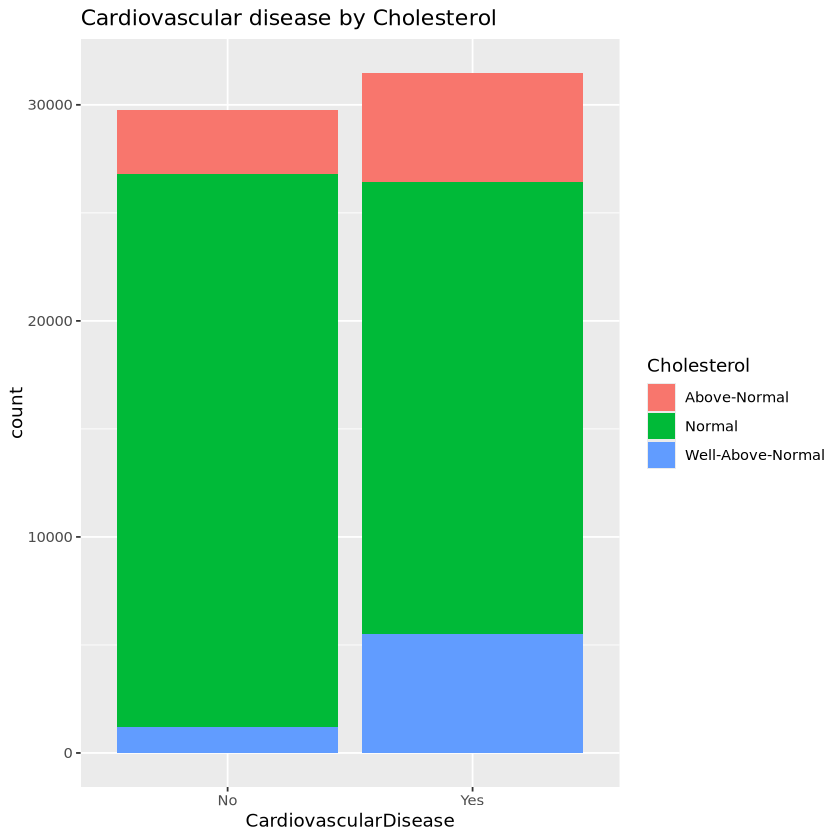

In [196]:
col <- "Cholesterol"
ggplot(data, aes(x = CardiovascularDisease, fill = data[,col])) +
geom_bar() +
labs(title = paste("Cardiovascular disease by", col), fill=col)
chisq.test(table(data[,c(col, "CardiovascularDisease")]))

In [223]:
data$SystolicPressure <- as.factor(round(data$SystolicPressure / 10) * 10)
data$DisatolicPressure <- as.factor(round(data$DisatolicPressure / 10) * 10)
data$Pulse <- as.factor(round(data$Pulse / 10) * 10)

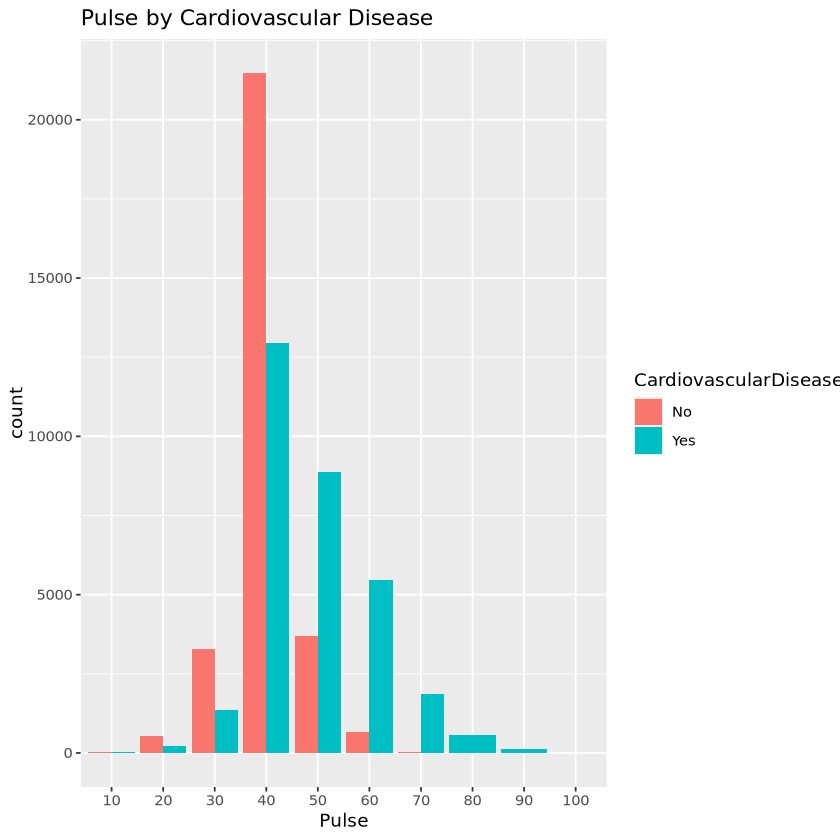

In [234]:
ggplot(data, aes(x=Pulse, fill=CardiovascularDisease)) + 
labs(title="Pulse by Cardiovascular Disease") +
geom_bar(position = "dodge") 

In [160]:
chisq.test(table(data[,c("Gender", "CardiovascularDisease")]))
chisq.test(table(data[,c("SystolicPressure", "CardiovascularDisease")]))
chisq.test(table(data[,c("SystolicPressure", "CardiovascularDisease")]))
chisq.test(table(data[,c("DisatolicPressure", "CardiovascularDisease")]))
chisq.test(table(data[,c("Cholesterol", "CardiovascularDisease")]))
chisq.test(table(data[,c("Glucose", "CardiovascularDisease")]))
chisq.test(table(data[,c("Smoke", "CardiovascularDisease")]))
chisq.test(table(data[,c("Alcohol", "CardiovascularDisease")]))
chisq.test(table(data[,c("Active", "CardiovascularDisease")]))
chisq.test(table(data[,c("Pulse", "CardiovascularDisease")]))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(data[, c("Gender", "CardiovascularDisease")])
X-squared = 0.06557, df = 1, p-value = 0.7979


Warning message in chisq.test(table(data[, c("SystolicPressure", "CardiovascularDisease")])):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(data[, c("SystolicPressure", "CardiovascularDisease")])
X-squared = 20270, df = 74, p-value < 2.2e-16


Warning message in chisq.test(table(data[, c("SystolicPressure", "CardiovascularDisease")])):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(data[, c("SystolicPressure", "CardiovascularDisease")])
X-squared = 20270, df = 74, p-value < 2.2e-16


Warning message in chisq.test(table(data[, c("DisatolicPressure", "CardiovascularDisease")])):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(data[, c("DisatolicPressure", "CardiovascularDisease")])
X-squared = 12481, df = 48, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(data[, c("Cholesterol", "CardiovascularDisease")])
X-squared = 3755.2, df = 2, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(data[, c("Glucose", "CardiovascularDisease")])
X-squared = 706.49, df = 2, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(data[, c("Smoke", "CardiovascularDisease")])
X-squared = 23.456, df = 1, p-value = 1.278e-06



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(data[, c("Alcohol", "CardiovascularDisease")])
X-squared = 5.8147, df = 1, p-value = 0.01589



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(data[, c("Active", "CardiovascularDisease")])
X-squared = 90.542, df = 1, p-value < 2.2e-16


Warning message in chisq.test(table(data[, c("Pulse", "CardiovascularDisease")])):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(data[, c("Pulse", "CardiovascularDisease")])
X-squared = 11442, df = 79, p-value < 2.2e-16


In [141]:
chisq.test(x = data$Gender, y=data$CardiovascularDisease)
chisq.test(x = data$SystolicPressure, y=data$CardiovascularDisease)
chisq.test(x = data$Gender, y=data$CardiovascularDisease)
chisq.test(x = data$Gender, y=data$CardiovascularDisease)
chisq.test(x = data$Gender, y=data$CardiovascularDisease)
chisq.test(x = data$Gender, y=data$CardiovascularDisease)
chisq.test(x = data$Gender, y=data$CardiovascularDisease)


	Pearson's Chi-squared test with Yates' continuity correction

data:  data$Gender and data$CardiovascularDisease
X-squared = 0.06557, df = 1, p-value = 0.7979


In [137]:
chisq.test(x = data$cardio, y=data$smoke)


	Pearson's Chi-squared test with Yates' continuity correction

data:  data$cardio and data$smoke
X-squared = 23.456, df = 1, p-value = 1.278e-06


In [146]:
table(data[, c("cardio", "smoke")])

      smoke
cardio    No   Yes
   No  26946  2796
   Yes 28865  2608

### Wilcoxon 

In [208]:
wilcox.test(x = data[data$CardiovascularDisease == "Yes", "Age.years."], y = data[data$CardiovascularDisease == "No", "Age.years."], alternative = "greater")
wilcox.test(x = data[data$CardiovascularDisease == "Yes", "Weight.kg."], y = data[data$CardiovascularDisease == "No", "Weight.kg."], alternative = "greater")
wilcox.test(x = data[data$CardiovascularDisease == "Yes", "Height.cm."], y = data[data$CardiovascularDisease == "No", "Height.cm."], alternative = "two.sided")
wilcox.test(x = data[data$CardiovascularDisease == "Yes", "BMI"], y = data[data$CardiovascularDisease == "No", "BMI"], alternative = "greater")


	Wilcoxon rank sum test with continuity correction

data:  data[data$CardiovascularDisease == "Yes", "Age.years."] and data[data$CardiovascularDisease == "No", "Age.years."]
W = 607660506, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  data[data$CardiovascularDisease == "Yes", "Weight.kg."] and data[data$CardiovascularDisease == "No", "Weight.kg."]
W = 581213520, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0



	Wilcoxon rank sum test with continuity correction

data:  data[data$CardiovascularDisease == "Yes", "Height.cm."] and data[data$CardiovascularDisease == "No", "Height.cm."]
W = 453704870, p-value = 5.184e-11
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  data[data$CardiovascularDisease == "Yes", "BMI"] and data[data$CardiovascularDisease == "No", "BMI"]
W = 595260376, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0


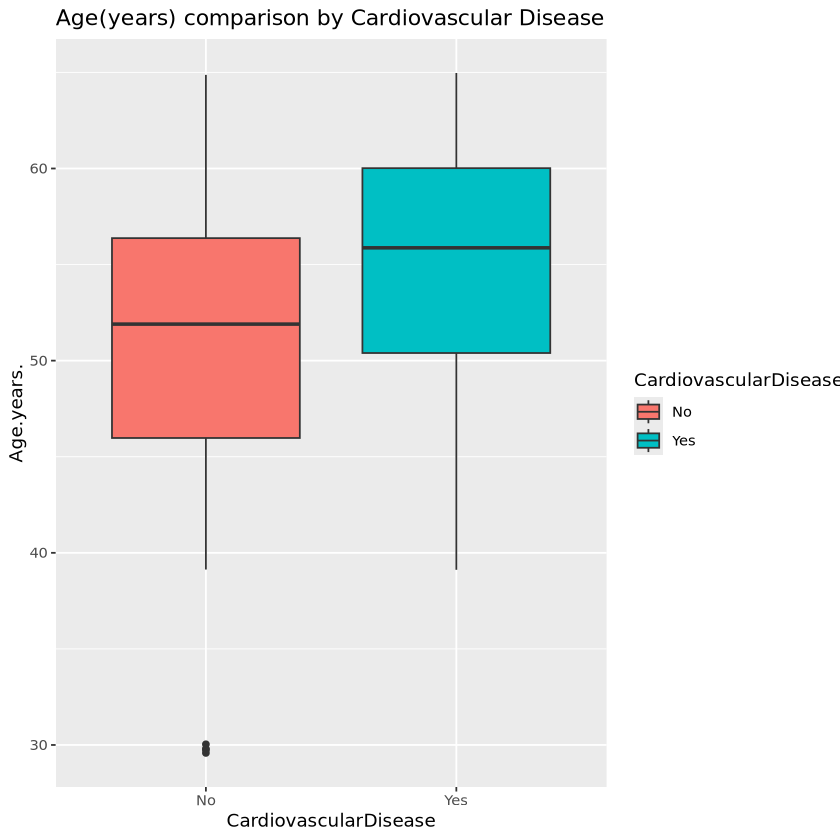

In [218]:
ggplot(data, aes(x = CardiovascularDisease, y = Age.years., fill=CardiovascularDisease)) +
 geom_boxplot() + 
 labs(title="Age(years) comparison by Cardiovascular Disease")

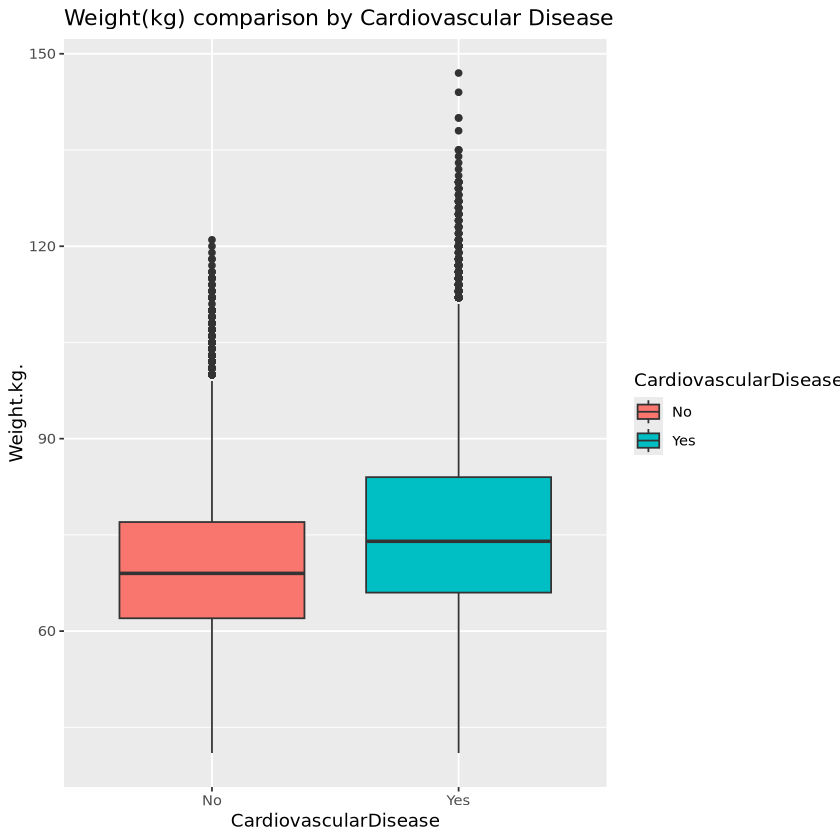

In [219]:
ggplot(data, aes(x = CardiovascularDisease, y = Weight.kg., fill=CardiovascularDisease)) +
 geom_boxplot() + 
 labs(title="Weight(kg) comparison by Cardiovascular Disease")

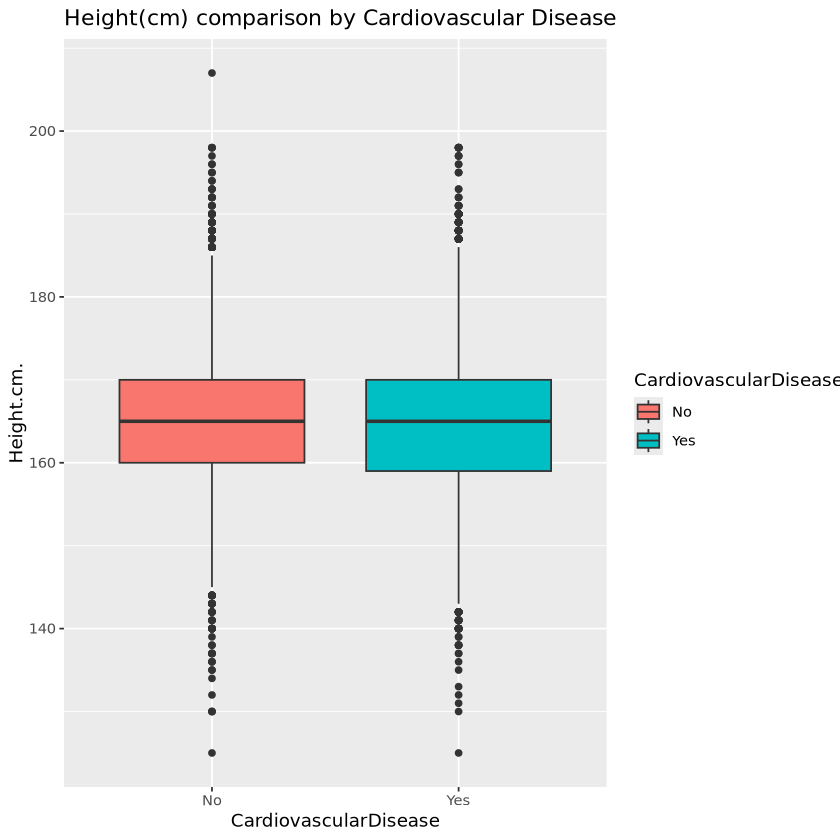

In [221]:
ggplot(data, aes(x = CardiovascularDisease, y = Height.cm., fill=CardiovascularDisease)) +
 geom_boxplot() + 
 labs(title="Height(cm) comparison by Cardiovascular Disease")

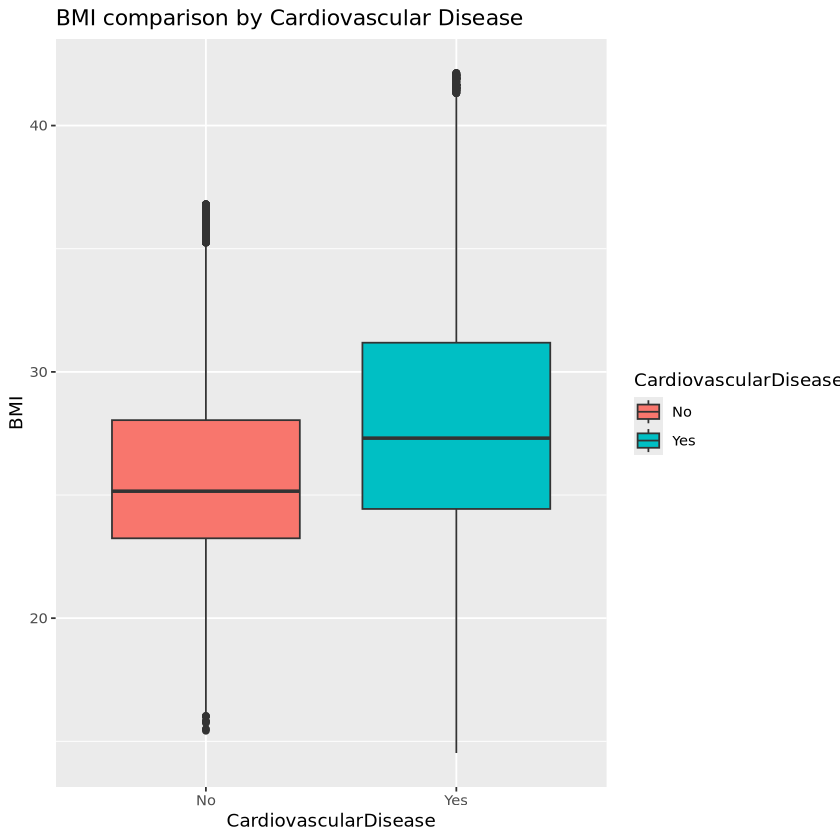

In [222]:
ggplot(data, aes(x = CardiovascularDisease, y = BMI, fill=CardiovascularDisease)) +
 geom_boxplot() + 
 labs(title="BMI comparison by Cardiovascular Disease")

In [215]:
kruskal.test(x=data$Age.years., g=data$CardiovascularDisease)
kruskal.test(x=data$Height.cm., g=data$CardiovascularDisease)
kruskal.test(x=data$Weight.kg., g=data$CardiovascularDisease)
kruskal.test(x=data$BMI, g=data$CardiovascularDisease)
kruskal.test(x=data$SystolicPressure, g=data$CardiovascularDisease)
kruskal.test(x=data$DisatolicPressure, g=data$CardiovascularDisease)
kruskal.test(x=data$Pulse, g=data$CardiovascularDisease)


	Kruskal-Wallis rank sum test

data:  data$Age.years. and data$CardiovascularDisease
Kruskal-Wallis chi-squared = 4082.6, df = 1, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  data$Height.cm. and data$CardiovascularDisease
Kruskal-Wallis chi-squared = 43.106, df = 1, p-value = 5.184e-11



	Kruskal-Wallis rank sum test

data:  data$Weight.kg. and data$CardiovascularDisease
Kruskal-Wallis chi-squared = 2685, df = 1, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  data$BMI and data$CardiovascularDisease
Kruskal-Wallis chi-squared = 3389.7, df = 1, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  data$SystolicPressure and data$CardiovascularDisease
Kruskal-Wallis chi-squared = 17882, df = 1, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  data$DisatolicPressure and data$CardiovascularDisease
Kruskal-Wallis chi-squared = 11278, df = 1, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  data$Pulse and data$CardiovascularDisease
Kruskal-Wallis chi-squared = 10429, df = 1, p-value < 2.2e-16


In [213]:
t.test(x = data[data$CardiovascularDisease == "Yes", "Height.cm."], y = data[data$CardiovascularDisease == "No", "Height.cm."], alternative = "two.sided")


	Welch Two Sample t-test

data:  data[data$CardiovascularDisease == "Yes", "Height.cm."] and data[data$CardiovascularDisease == "No", "Height.cm."]
t = -6.653, df = 61186, p-value = 2.896e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5382276 -0.2932665
sample estimates:
mean of x mean of y 
 164.4709  164.8867 
